In [3]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [4]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

UsageError: Line magic function `%` not found.


# <font color = blue> IMDb Movie Assignment </font>

You have the data for the 100 top-rated movies from the past decade along with various pieces of information about the movie, its actors, and the voters who have rated these movies online. In this assignment, you will try to find some interesting insights into these movies and their voters, using Python.

##  Task 1: Reading the data

- ### Subtask 1.1: Read the Movies Data.

Read the movies data file provided and store it in a dataframe `movies`.

In [11]:
# Read the csv file using 'read_csv'. Please write your dataset location here.

df=pd.read_csv("Movie+Assignment+Data.csv")
df

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,La La Land,2016,30000000,151101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA
1,Zootopia,2016,150000000,341268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA
2,Lion,2016,12000000,51738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia
3,Arrival,2016,47000000,100546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA
4,Manchester by the Sea,2016,9000000,47695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Whiplash,2014,3300000,13092000,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970.0,535.0,...,8.3,8.2,8.1,8.1,8.2,8.0,8.6,8.4,R,USA
96,Before Midnight,2013,3000000,8114507,Seamus Davey-Fitzpatrick,Ariane Labed,Athina Rachel Tsangari,140,63.0,48.0,...,7.8,7.6,7.3,7.4,7.2,7.0,8.0,7.9,R,USA
97,Star Wars: Episode VII - The Force Awakens,2015,245000000,936662225,Doug Walker,Rob Walker,0,131,12.0,0.0,...,7.9,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA
98,Harry Potter and the Deathly Hallows: Part I,2010,150000000,296347721,Rupert Grint,Toby Jones,Alfred Enoch,10000,2000.0,1000.0,...,7.3,8.1,7.4,7.3,8.0,6.7,7.9,7.5,PG-13,UK


- ###  Subtask 1.2: Inspect the Dataframe

Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.

In [4]:
# Check the number of rows and columns in the dataframe
print("The number of rows are ",df.shape[0],"\n","The number of columns are",df.shape[1])


The number of rows are  100 
 The number of columns are 62


In [5]:
# Check the column-wise info of the dataframe
df.all(axis ='columns')


0      True
1      True
2      True
3      True
4      True
      ...  
95     True
96     True
97    False
98     True
99     True
Length: 100, dtype: bool

In [6]:
# Check the summary for the numeric columns 

df.describe()

,title_year,budget,Gross,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,MetaCritic,Runtime,CVotes10,...,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS
count,100.000000,1.000000e+02,1.000000e+02,100.000000,99.000000,98.000000,100.000000,95.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2012.820000,7.838400e+07,1.468679e+08,13407.270000,7377.303030,3002.153061,7.883000,78.252632,126.420000,73212.160000,...,7.982000,7.732000,7.723000,7.780000,7.65100,7.624000,7.770000,7.274000,7.958000,7.793000
std,1.919491,7.445295e+07,1.454004e+08,10649.037862,13471.568216,6940.301133,0.247433,9.122066,19.050799,82669.594746,...,0.321417,0.251814,0.260479,0.282128,0.21485,0.213258,0.301344,0.361987,0.232327,0.264099
min,2010.000000,3.000000e+06,2.238380e+05,39.000000,12.000000,0.000000,7.500000,62.000000,91.000000,6420.000000,...,7.300000,7.300000,7.200000,7.200000,7.10000,7.100000,7.000000,6.400000,7.500000,7.300000
25%,2011.000000,1.575000e+07,4.199752e+07,1000.000000,580.000000,319.750000,7.700000,72.000000,114.750000,30587.000000,...,7.700000,7.600000,7.500000,7.600000,7.50000,7.475000,7.500000,7.100000,7.800000,7.600000
50%,2013.000000,4.225000e+07,1.070266e+08,13000.000000,1000.000000,626.500000,7.800000,78.000000,124.000000,54900.500000,...,8.000000,7.700000,7.700000,7.800000,7.65000,7.600000,7.800000,7.300000,7.950000,7.750000
75%,2014.000000,1.500000e+08,2.107548e+08,20000.000000,11000.000000,1000.000000,8.100000,83.500000,136.250000,80639.000000,...,8.200000,7.900000,7.900000,8.000000,7.80000,7.800000,7.925000,7.500000,8.100000,7.925000
max,2016.000000,2.600000e+08,9.366622e+08,35000.000000,96000.000000,46000.000000,8.800000,100.000000,180.000000,584839.000000,...,8.800000,8.700000,8.700000,8.500000,8.10000,8.100000,8.500000,8.200000,8.700000,8.800000


## Task 2: Data Analysis

Now that we have loaded the dataset and inspected it, we see that most of the data is in place. As of now, no data cleaning is required, so let's start with some data manipulation, analysis, and visualisation to get various insights about the data. 

-  ###  Subtask 2.1: Reduce those Digits!

These numbers in the `budget` and `gross` are too big, compromising its readability. Let's convert the unit of the `budget` and `gross` columns from `$` to `million $` first.

In [7]:
# Divide the 'gross' and 'budget' columns by 1000000 to convert '$' to 'million $'

df_newData = df.loc[:,["Gross", "budget"]].div(1000000).round(2)
df_newData

,Gross,budget
0,151.10,30.0
1,341.27,150.0
2,51.74,12.0
3,100.55,47.0
4,47.70,9.0
...,...,...
95,13.09,3.3
96,8.11,3.0
97,936.66,245.0
98,296.35,150.0


-  ###  Subtask 2.2: Let's Talk Profit!

    1. Create a new column called `profit` which contains the difference of the two columns: `gross` and `budget`.
    2. Sort the dataframe using the `profit` column as reference.
    3. Extract the top ten profiting movies in descending order and store them in a new dataframe - `top10`.
    4. Plot a scatter or a joint plot between the columns `budget` and `profit` and write a few words on what you observed.
    5. Extract the movies with a negative profit and store them in a new dataframe - `neg_profit`

In [8]:
# Create the new column named 'profit' by subtracting the 'budget' column from the 'gross' column

df["Profit"] = df["Gross"] - df["budget"]
df

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,Profit
0,La La Land,2016,30000000,151101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA,121101803
1,Zootopia,2016,150000000,341268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA,191268248
2,Lion,2016,12000000,51738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia,39738905
3,Arrival,2016,47000000,100546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA,53546139
4,Manchester by the Sea,2016,9000000,47695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA,38695371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Whiplash,2014,3300000,13092000,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970.0,535.0,...,8.2,8.1,8.1,8.2,8.0,8.6,8.4,R,USA,9792000
96,Before Midnight,2013,3000000,8114507,Seamus Davey-Fitzpatrick,Ariane Labed,Athina Rachel Tsangari,140,63.0,48.0,...,7.6,7.3,7.4,7.2,7.0,8.0,7.9,R,USA,5114507
97,Star Wars: Episode VII - The Force Awakens,2015,245000000,936662225,Doug Walker,Rob Walker,0,131,12.0,0.0,...,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691662225
98,Harry Potter and the Deathly Hallows: Part I,2010,150000000,296347721,Rupert Grint,Toby Jones,Alfred Enoch,10000,2000.0,1000.0,...,8.1,7.4,7.3,8.0,6.7,7.9,7.5,PG-13,UK,146347721


In [9]:
# Sort the dataframe with the 'profit' column as reference using the 'sort_values' function. Make sure to set the argument
#'ascending' to 'False'
df = df.sort_values(by='Profit', ascending=False)
df
#df.sort_values([('Profit')], ascending=False).head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,Profit
97,Star Wars: Episode VII - The Force Awakens,2015,245000000,936662225,Doug Walker,Rob Walker,0,131,12.0,0.0,...,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691662225
11,The Avengers,2012,220000000,623279547,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000.0,19000.0,...,8.1,7.9,7.9,8.1,7.4,8.3,7.9,PG-13,USA,403279547
47,Deadpool,2016,58000000,363024263,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,...,7.9,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305024263
32,The Hunger Games: Catching Fire,2013,130000000,424645577,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000.0,523.0,...,7.9,7.3,7.2,7.9,6.7,7.7,7.4,PG-13,USA,294645577
12,Toy Story 3,2010,200000000,414984497,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,...,8.3,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,214984497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,Scott Pilgrim vs. the World,2010,60000000,31494270,Anna Kendrick,Kieran Culkin,Ellen Wong,10000,1000.0,719.0,...,7.2,7.1,7.1,7.0,6.6,7.8,7.4,PG-13,USA,-28505730
7,Tangled,2010,260000000,200807262,Brad Garrett,Donna Murphy,M.C. Gainey,799,553.0,284.0,...,8.0,7.7,7.6,7.9,6.9,7.9,7.7,PG,USA,-59192738
17,Edge of Tomorrow,2014,178000000,100189501,Tom Cruise,Lara Pulver,Noah Taylor,10000,854.0,509.0,...,7.7,7.8,7.8,7.8,7.5,8.0,7.8,PG-13,USA,-77810499
39,The Little Prince,2015,81200000,1339152,Jeff Bridges,James Franco,Mackenzie Foy,12000,11000.0,6000.0,...,7.9,7.5,7.4,7.9,6.6,7.7,7.7,PG,France,-79860848


In [23]:
# Get the top 10 profitable movies by using position based indexing. Specify the rows till 10 (0-9)

# df = df.sort_values(by='Profit', ascending=False)
# df.head(10)
most_profit = df.groupby(['Profit', 'Title']).size().sort_values(ascending=False)[:10]
most_profit

Profit     Title                                     
691662225  Star Wars: Episode VII - The Force Awakens    1
24988180   Spotlight                                     1
17707116   Fury                                          1
18043505   Kick-Ass                                      1
20054909   Drive                                         1
20887263   The Theory of Everything                      1
21359200   Boyhood                                       1
22296514   Dallas Buyers Club                            1
22991439   Interstellar                                  1
23779955   Nightcrawler                                  1
dtype: int64

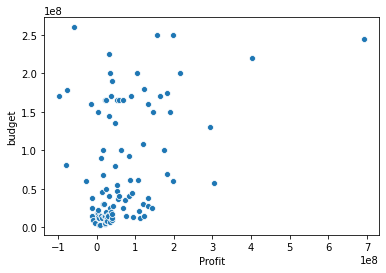

In [42]:
#Plot profit vs budget
sns.scatterplot(x="Profit", y="budget", data=df);


The dataset contains the 100 best performing movies from the year 2010 to 2016. However scatter plot tells a different story. You can notice that there are some movies with negative profit. Although good movies do incur losses, but there appear to be quite a few movie with losses. What can be the reason behind this? Lets have a closer look at this by finding the movies with negative profit.

In [15]:
#Find the movies with negative profit
df = df.sort_values(by='Profit')
df.head(10)

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,Profit
22,Hugo,2011,170000000,73820094,ChloÃ« Grace Moretz,Christopher Lee,Ray Winstone,17000,16000.0,1000.0,...,7.4,7.5,7.5,7.6,7.4,7.7,7.5,PG,USA,-96179906
39,The Little Prince,2015,81200000,1339152,Jeff Bridges,James Franco,Mackenzie Foy,12000,11000.0,6000.0,...,7.9,7.5,7.4,7.9,6.6,7.7,7.7,PG,France,-79860848
17,Edge of Tomorrow,2014,178000000,100189501,Tom Cruise,Lara Pulver,Noah Taylor,10000,854.0,509.0,...,7.7,7.8,7.8,7.8,7.5,8.0,7.8,PG-13,USA,-77810499
7,Tangled,2010,260000000,200807262,Brad Garrett,Donna Murphy,M.C. Gainey,799,553.0,284.0,...,8.0,7.7,7.6,7.9,6.9,7.9,7.7,PG,USA,-59192738
46,Scott Pilgrim vs. the World,2010,60000000,31494270,Anna Kendrick,Kieran Culkin,Ellen Wong,10000,1000.0,719.0,...,7.2,7.1,7.1,7.0,6.6,7.8,7.4,PG-13,USA,-28505730
28,X-Men: First Class,2011,160000000,146405371,Jennifer Lawrence,Michael Fassbender,Oliver Platt,34000,13000.0,1000.0,...,7.8,7.6,7.5,7.7,7.3,7.8,7.7,PG-13,USA,-13594629
82,Flipped,2010,14000000,1752214,Madeline Carroll,Rebecca De Mornay,Aidan Quinn,1000,872.0,767.0,...,7.7,7.4,7.3,7.6,6.4,7.5,7.7,PG,USA,-12247786
66,Warrior,2011,25000000,13651662,Tom Hardy,Frank Grillo,Kevin Dunn,27000,798.0,581.0,...,8.0,7.7,7.7,7.5,7.1,8.2,8.1,PG-13,USA,-11348338
56,Rush,2013,38000000,26903709,Chris Hemsworth,Olivia Wilde,Alexandra Maria Lara,26000,10000.0,471.0,...,7.9,7.8,7.8,7.8,7.1,7.9,8.1,R,UK,-11096291
89,Amour,2012,8900000,225377,Isabelle Huppert,Emmanuelle Riva,Jean-Louis Trintignant,678,432.0,319.0,...,7.9,7.9,7.8,8.1,7.2,7.9,7.8,PG-13,France,-8674623


**`Checkpoint 1:`** Can you spot the movie `Tangled` in the dataset? You may be aware of the movie 'Tangled'. Although its one of the highest grossing movies of all time, it has negative profit as per this result. If you cross check the gross values of this movie (link: https://www.imdb.com/title/tt0398286/), you can see that the gross in the dataset accounts only for the domestic gross and not the worldwide gross. This is true for may other movies also in the list.

- ### Subtask 2.3: The General Audience and the Critics

You might have noticed the column `MetaCritic` in this dataset. This is a very popular website where an average score is determined through the scores given by the top-rated critics. Second, you also have another column `IMDb_rating` which tells you the IMDb rating of a movie. This rating is determined by taking the average of hundred-thousands of ratings from the general audience. 

As a part of this subtask, you are required to find out the highest rated movies which have been liked by critics and audiences alike.
1. Firstly you will notice that the `MetaCritic` score is on a scale of `100` whereas the `IMDb_rating` is on a scale of 10. First convert the `MetaCritic` column to a scale of 10.
2. Now, to find out the movies which have been liked by both critics and audiences alike and also have a high rating overall, you need to -
    - Create a new column `Avg_rating` which will have the average of the `MetaCritic` and `Rating` columns
    - Retain only the movies in which the absolute difference(using abs() function) between the `IMDb_rating` and `Metacritic` columns is less than 0.5. Refer to this link to know how abs() funtion works - https://www.geeksforgeeks.org/abs-in-python/ .
    - Sort these values in a descending order of `Avg_rating` and retain only the movies with a rating equal to higher than `8` and store these movies in a new dataframe `UniversalAcclaim`.
    

In [24]:
# Change the scale of MetaCritic

df ["IMDB_Rating"] = df['MetaCritic'].div(10)
df.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,Profit,IMDB_Rating
22,Hugo,2011,170000000,73820094,ChloÃ« Grace Moretz,Christopher Lee,Ray Winstone,17000,16000.0,1000.0,...,7.5,7.5,7.6,7.4,7.7,7.5,PG,USA,-96179906,8.3
39,The Little Prince,2015,81200000,1339152,Jeff Bridges,James Franco,Mackenzie Foy,12000,11000.0,6000.0,...,7.5,7.4,7.9,6.6,7.7,7.7,PG,France,-79860848,7.0
17,Edge of Tomorrow,2014,178000000,100189501,Tom Cruise,Lara Pulver,Noah Taylor,10000,854.0,509.0,...,7.8,7.8,7.8,7.5,8.0,7.8,PG-13,USA,-77810499,7.1
7,Tangled,2010,260000000,200807262,Brad Garrett,Donna Murphy,M.C. Gainey,799,553.0,284.0,...,7.7,7.6,7.9,6.9,7.9,7.7,PG,USA,-59192738,7.1
46,Scott Pilgrim vs. the World,2010,60000000,31494270,Anna Kendrick,Kieran Culkin,Ellen Wong,10000,1000.0,719.0,...,7.1,7.1,7.0,6.6,7.8,7.4,PG-13,USA,-28505730,6.9


In [26]:
# Find the average ratings
df["Avg_Rating"] = df[['MetaCritic', 'IMDB_Rating']].mean(axis=1)
df

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,Profit,IMDB_Rating,Avg_Rating
22,Hugo,2011,170000000,73820094,ChloÃ« Grace Moretz,Christopher Lee,Ray Winstone,17000,16000.0,1000.0,...,7.5,7.6,7.4,7.7,7.5,PG,USA,-96179906,8.3,45.65
39,The Little Prince,2015,81200000,1339152,Jeff Bridges,James Franco,Mackenzie Foy,12000,11000.0,6000.0,...,7.4,7.9,6.6,7.7,7.7,PG,France,-79860848,7.0,38.50
17,Edge of Tomorrow,2014,178000000,100189501,Tom Cruise,Lara Pulver,Noah Taylor,10000,854.0,509.0,...,7.8,7.8,7.5,8.0,7.8,PG-13,USA,-77810499,7.1,39.05
7,Tangled,2010,260000000,200807262,Brad Garrett,Donna Murphy,M.C. Gainey,799,553.0,284.0,...,7.6,7.9,6.9,7.9,7.7,PG,USA,-59192738,7.1,39.05
46,Scott Pilgrim vs. the World,2010,60000000,31494270,Anna Kendrick,Kieran Culkin,Ellen Wong,10000,1000.0,719.0,...,7.1,7.0,6.6,7.8,7.4,PG-13,USA,-28505730,6.9,37.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,Toy Story 3,2010,200000000,414984497,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,...,8.1,8.1,8.1,8.5,8.3,G,USA,214984497,9.2,50.60
32,The Hunger Games: Catching Fire,2013,130000000,424645577,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000.0,523.0,...,7.2,7.9,6.7,7.7,7.4,PG-13,USA,294645577,7.6,41.80
47,Deadpool,2016,58000000,363024263,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,...,7.8,7.9,7.3,8.1,7.9,R,USA,305024263,6.5,35.75
11,The Avengers,2012,220000000,623279547,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000.0,19000.0,...,7.9,8.1,7.4,8.3,7.9,PG-13,USA,403279547,6.9,37.95


In [28]:
#Sort in descending order of average rating
df.sort_values(by="Avg_Rating", ascending=False)

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,Profit,IMDB_Rating,Avg_Rating
94,Boyhood,2014,4000000,25359200,Ellar Coltrane,Lorelei Linklater,Libby Villari,230,193.0,127.0,...,7.7,7.7,7.2,8.0,7.9,R,USA,21359200,10.0,55.00
4,Manchester by the Sea,2016,9000000,47695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.6,7.6,7.1,7.9,7.8,R,USA,38695371,9.6,52.80
69,12 Years a Slave,2013,20000000,56667870,QuvenzhanÃ© Wallis,Scoot McNairy,Taran Killam,2000,660.0,500.0,...,7.8,8.1,7.7,8.3,8.0,R,USA,36667870,9.6,52.80
34,Gravity,2013,100000000,274084951,Phaldut Sharma,Basher Savage,Amy Warren,39,23.0,13.0,...,7.7,7.5,7.5,7.9,7.8,PG-13,UK,174084951,9.6,52.80
53,The Social Network,2010,40000000,96917897,Andrew Garfield,Dustin Fitzsimons,Marcella Lentz-Pope,10000,349.0,81.0,...,7.5,7.4,7.3,8.0,7.6,PG-13,USA,56917897,9.5,52.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Flipped,2010,14000000,1752214,Madeline Carroll,Rebecca De Mornay,Aidan Quinn,1000,872.0,767.0,...,7.3,7.6,6.4,7.5,7.7,PG,USA,-12247786,NaN,NaN
71,The Book Thief,2013,19000000,21483154,Emily Watson,Sophie NÃ©lisse,Roger Allam,876,526.0,326.0,...,7.5,8.0,6.6,7.6,7.5,PG-13,USA,2483154,NaN,NaN
88,About Time,2013,12000000,15294553,Tom Hughes,Tom Hollander,Lindsay Duncan,565,555.0,171.0,...,7.5,7.8,6.9,7.8,7.7,R,UK,3294553,NaN,NaN
52,Lone Survivor,2013,40000000,125069696,Jerry Ferrara,Scott Elrod,Dan Bilzerian,480,449.0,127.0,...,7.4,7.8,6.8,7.8,7.3,R,USA,85069696,NaN,NaN


In [41]:
# Find the movies with metacritic-rating < 0.5 and also with the average rating of >8
df["Absolute_val"] = df[['MetaCritic', 'IMDB_Rating']].abs()
UniversalAcclaim = df[(df.Absolute_val < 0.5) | (df.Avg_Rating >= 8)]
UniversalAcclaim.to_csv("UniversalAcclaim.csv")
df1=pd.read_csv("UniversalAcclaim.csv", index_col=0)
df1.sort_values(by="Avg_Rating", ascending=False)

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,Profit,IMDB_Rating,Avg_Rating,Absolute_val
94,Boyhood,2014,4000000,25359200,Ellar Coltrane,Lorelei Linklater,Libby Villari,230,193.0,127.0,...,7.7,7.2,8.0,7.9,R,USA,21359200,10.0,55.00,100.0
4,Manchester by the Sea,2016,9000000,47695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.6,7.1,7.9,7.8,R,USA,38695371,9.6,52.80,96.0
69,12 Years a Slave,2013,20000000,56667870,QuvenzhanÃ© Wallis,Scoot McNairy,Taran Killam,2000,660.0,500.0,...,8.1,7.7,8.3,8.0,R,USA,36667870,9.6,52.80,96.0
34,Gravity,2013,100000000,274084951,Phaldut Sharma,Basher Savage,Amy Warren,39,23.0,13.0,...,7.5,7.5,7.9,7.8,PG-13,UK,174084951,9.6,52.80,96.0
53,The Social Network,2010,40000000,96917897,Andrew Garfield,Dustin Fitzsimons,Marcella Lentz-Pope,10000,349.0,81.0,...,7.4,7.3,8.0,7.6,PG-13,USA,56917897,9.5,52.25,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Harry Potter and the Deathly Hallows: Part I,2010,150000000,296347721,Rupert Grint,Toby Jones,Alfred Enoch,10000,2000.0,1000.0,...,8.0,6.7,7.9,7.5,PG-13,UK,146347721,6.5,35.75,65.0
42,Fury,2014,68000000,85707116,Brad Pitt,Logan Lerman,Jim Parrack,11000,8000.0,697.0,...,7.4,6.8,7.6,7.5,R,USA,17707116,6.4,35.20,64.0
40,Shutter Island,2010,80000000,127968405,Leonardo DiCaprio,Joseph Sikora,Nellie Sciutto,29000,223.0,163.0,...,7.6,7.6,7.8,8.1,R,USA,47968405,6.3,34.65,63.0
44,Les MisÃ©rables,2012,61000000,148775460,Hugh Jackman,Eddie Redmayne,Anne Hathaway,20000,13000.0,11000.0,...,7.7,6.6,7.6,7.5,PG-13,USA,87775460,6.3,34.65,63.0


**`Checkpoint 2:`** Can you spot a `Star Wars` movie in your final dataset?

- ### Subtask 2.4: Find the Most Popular Trios - I

You're a producer looking to make a blockbuster movie. There will primarily be three lead roles in your movie and you wish to cast the most popular actors for it. Now, since you don't want to take a risk, you will cast a trio which has already acted in together in a movie before. The metric that you've chosen to check the popularity is the Facebook likes of each of these actors.

The dataframe has three columns to help you out for the same, viz. `actor_1_facebook_likes`, `actor_2_facebook_likes`, and `actor_3_facebook_likes`. Your objective is to find the trios which has the most number of Facebook likes combined. That is, the sum of `actor_1_facebook_likes`, `actor_2_facebook_likes` and `actor_3_facebook_likes` should be maximum.
Find out the top 5 popular trios, and output their names in a list.


In [43]:
# Write your code here

popular_trios=df.groupby(['actor_1_name', 'actor_2_name', 'actor_3_name'])['actor_1_facebook_likes','actor_2_facebook_likes', 'actor_3_facebook_likes'].sum().reset_index()
popular_trios.head(5)

,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes
0,Aidan Turner,Adam Brown,James Nesbitt,10000,1944.0,1546.0
1,Albert Finney,Helen McCrory,Rory Kinnear,883,563.0,393.0
2,Aldis Hodge,Neil Brown Jr.,R. Marcos Taylor,559,427.0,303.0
3,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,0.0
4,Amy Poehler,Mindy Kaling,Phyllis Smith,1000,767.0,384.0


- ### Subtask 2.5: Find the Most Popular Trios - II

In the previous subtask you found the popular trio based on the total number of facebook likes. Let's add a small condition to it and make sure that all three actors are popular. The condition is **none of the three actors' Facebook likes should be less than half of the other two**. For example, the following is a valid combo:
- actor_1_facebook_likes: 70000
- actor_2_facebook_likes: 40000
- actor_3_facebook_likes: 50000

But the below one is not:
- actor_1_facebook_likes: 70000
- actor_2_facebook_likes: 40000
- actor_3_facebook_likes: 30000

since in this case, `actor_3_facebook_likes` is 30000, which is less than half of `actor_1_facebook_likes`.

Having this condition ensures that you aren't getting any unpopular actor in your trio (since the total likes calculated in the previous question doesn't tell anything about the individual popularities of each actor in the trio.).

You can do a manual inspection of the top 5 popular trios you have found in the previous subtask and check how many of those trios satisfy this condition. Also, which is the most popular trio after applying the condition above?

**Write your answers below.**

- **`No. of trios that satisfy the above condition:`**

- **`Most popular trio after applying the condition:`**

**`Optional:`** Even though you are finding this out by a natural inspection of the dataframe, can you also achieve this through some *if-else* statements to incorporate this. You can try this out on your own time after you are done with the assignment.

In [ ]:
# Your answer here (optional)



- ### Subtask 2.6: Runtime Analysis

There is a column named `Runtime` in the dataframe which primarily shows the length of the movie. It might be intersting to see how this variable this distributed. Plot a `histogram` or `distplot` of seaborn to find the `Runtime` range most of the movies fall into.

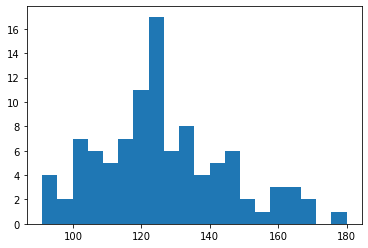

In [45]:
# Runtime histogram/density plot
plt.hist(df['Runtime'], bins=20);

**`Checkpoint 3:`** Most of the movies appear to be sharply 2 hour-long.

- ### Subtask 2.7: R-Rated Movies

Although R rated movies are restricted movies for the under 18 age group, still there are vote counts from that age group. Among all the R rated movies that have been voted by the under-18 age group, find the top 10 movies that have the highest number of votes i.e.`CVotesU18` from the `movies` dataframe. Store these in a dataframe named `PopularR`.

In [60]:
# Write your code here

PopularR=df.groupby(['Title'])['CVotesU18'].sum()
PopularR.to_csv("PopularR.csv")
df2=pd.read_csv("PopularR.csv", index_col=0)
df2.sort_values(by="CVotesU18", ascending=False).head(10)

,CVotesU18
Title,
Interstellar,5735
Inception,5678
Guardians of the Galaxy,5154
The Avengers,4953
The Dark Knight Rises,4726
Star Wars: Episode VII - The Force Awakens,4722
Deadpool,4598
Captain America: The Winter Soldier,3765
The Hunger Games: Catching Fire,3650


**`Checkpoint 4:`** Are these kids watching `Deadpool` a lot?

## Task 3 : Demographic analysis

If you take a look at the last columns in the dataframe, most of these are related to demographics of the voters (in the last subtask, i.e., 2.8, you made use one of these columns - CVotesU18). We also have three genre columns indicating the genres of a particular movie. We will extensively use these columns for the third and the final stage of our assignment wherein we will analyse the voters across all demographics and also see how these vary across various genres. So without further ado, let's get started with `demographic analysis`.

-  ###  Subtask 3.1 Combine the Dataframe by Genres

There are 3 columns in the dataframe - `genre_1`, `genre_2`, and `genre_3`. As a part of this subtask, you need to aggregate a few values over these 3 columns. 
1. First create a new dataframe `df_by_genre` that contains `genre_1`, `genre_2`, and `genre_3` and all the columns related to **CVotes/Votes** from the `movies` data frame. There are 47 columns to be extracted in total.
2. Now, Add a column called `cnt` to the dataframe `df_by_genre` and initialize it to one. You will realise the use of this column by the end of this subtask.
3. First group the dataframe `df_by_genre` by `genre_1` and find the sum of all the numeric columns such as `cnt`, columns related to CVotes and Votes columns and store it in a dataframe `df_by_g1`.
4. Perform the same operation for `genre_2` and `genre_3` and store it dataframes `df_by_g2` and `df_by_g3` respectively. 
5. Now that you have 3 dataframes performed by grouping over `genre_1`, `genre_2`, and `genre_3` separately, it's time to combine them. For this, add the three dataframes and store it in a new dataframe `df_add`, so that the corresponding values of Votes/CVotes get added for each genre.There is a function called `add()` in pandas which lets you do this. You can refer to this link to see how this function works. https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.add.html
6. The column `cnt` on aggregation has basically kept the track of the number of occurences of each genre.Subset the genres that have atleast 10 movies into a new dataframe `genre_top10` based on the `cnt` column value.
7. Now, take the mean of all the numeric columns by dividing them with the column value `cnt` and store it back to the same dataframe. We will be using this dataframe for further analysis in this task unless it is explicitly mentioned to use the dataframe `movies`.
8. Since the number of votes can't be a fraction, type cast all the CVotes related columns to integers. Also, round off all the Votes related columns upto two digits after the decimal point.


In [12]:
df

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,La La Land,2016,30000000,151101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA
1,Zootopia,2016,150000000,341268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA
2,Lion,2016,12000000,51738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia
3,Arrival,2016,47000000,100546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA
4,Manchester by the Sea,2016,9000000,47695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Whiplash,2014,3300000,13092000,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970.0,535.0,...,8.3,8.2,8.1,8.1,8.2,8.0,8.6,8.4,R,USA
96,Before Midnight,2013,3000000,8114507,Seamus Davey-Fitzpatrick,Ariane Labed,Athina Rachel Tsangari,140,63.0,48.0,...,7.8,7.6,7.3,7.4,7.2,7.0,8.0,7.9,R,USA
97,Star Wars: Episode VII - The Force Awakens,2015,245000000,936662225,Doug Walker,Rob Walker,0,131,12.0,0.0,...,7.9,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA
98,Harry Potter and the Deathly Hallows: Part I,2010,150000000,296347721,Rupert Grint,Toby Jones,Alfred Enoch,10000,2000.0,1000.0,...,7.3,8.1,7.4,7.3,8.0,6.7,7.9,7.5,PG-13,UK


In [13]:
# Create the dataframe df_by_genre
df_by_genre = pd.DataFrame(df, columns=['genre_1', 'genre_2','genre_3','CVotes10','CVotes09','CVotes08','CVotes07','CVotes06','CVotes05','CVotes04','CVotes03','CVotes02','CVotes01','CVotesMale','CVotesFemale','CVotesU18','CVotesU18M','CVotesU18F','CVotes1829','CVotes1829M','CVotes1829F','CVotes3044','CVotes3044M','CVotes3044F','CVotes45A','CVotes45AM','CVotes45AF','CVotes1000','CVotesUS','CVotesnUS','VotesM','VotesF','VotesU18','VotesU18M','VotesU18F','Votes1829','Votes1829M','Votes1829F','Votes3044','Votes3044M','Votes3044F','Votes45A','Votes45AM','Votes45AF','Votes1000','VotesUS','VotesnUS'])
df_by_genre

,genre_1,genre_2,genre_3,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,...,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS
0,Comedy,Drama,Music,74245,71191,64640,38831,17377,8044,3998,...,8.2,7.9,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1
1,Animation,Adventure,Comedy,53626,70912,102352,57261,16719,4539,1467,...,8.4,7.8,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0
2,Biography,Drama,NaN,23325,29830,40564,20296,5842,1669,558,...,8.4,8.0,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0
3,Drama,Mystery,Sci-Fi,55533,87850,109536,65440,26913,10556,5057,...,8.1,7.8,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9
4,Drama,NaN,NaN,18191,33532,46596,29626,11879,4539,1976,...,7.8,7.7,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Drama,Music,NaN,110404,161864,132656,56007,16577,6031,2937,...,8.5,8.3,8.3,8.2,8.1,8.1,8.2,8.0,8.6,8.4
96,Drama,Romance,NaN,16953,22109,31439,19251,8142,3412,1649,...,7.9,7.8,7.8,7.6,7.3,7.4,7.2,7.0,8.0,7.9
97,Action,Adventure,Fantasy,155391,161810,166378,99402,40734,18060,8751,...,8.3,8.0,7.9,8.2,7.9,7.8,8.2,7.7,8.2,7.9
98,Adventure,Family,Fantasy,68937,54947,102488,80465,31205,11792,4808,...,8.3,7.4,7.3,8.1,7.4,7.3,8.0,6.7,7.9,7.5


In [14]:
df_by_genre.to_csv("df_by_genre.csv")

In [15]:
# Create a column cnt and initialize it to 1

df3 = pd.read_csv("df_by_genre.csv", index_col=0)
df3.head(5)

df3["cnt"] = 1
df3

,genre_1,genre_2,genre_3,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
0,Comedy,Drama,Music,74245,71191,64640,38831,17377,8044,3998,...,7.9,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,1
1,Animation,Adventure,Comedy,53626,70912,102352,57261,16719,4539,1467,...,7.8,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,1
2,Biography,Drama,NaN,23325,29830,40564,20296,5842,1669,558,...,8.0,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,1
3,Drama,Mystery,Sci-Fi,55533,87850,109536,65440,26913,10556,5057,...,7.8,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,1
4,Drama,NaN,NaN,18191,33532,46596,29626,11879,4539,1976,...,7.7,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Drama,Music,NaN,110404,161864,132656,56007,16577,6031,2937,...,8.3,8.3,8.2,8.1,8.1,8.2,8.0,8.6,8.4,1
96,Drama,Romance,NaN,16953,22109,31439,19251,8142,3412,1649,...,7.8,7.8,7.6,7.3,7.4,7.2,7.0,8.0,7.9,1
97,Action,Adventure,Fantasy,155391,161810,166378,99402,40734,18060,8751,...,8.0,7.9,8.2,7.9,7.8,8.2,7.7,8.2,7.9,1
98,Adventure,Family,Fantasy,68937,54947,102488,80465,31205,11792,4808,...,7.4,7.3,8.1,7.4,7.3,8.0,6.7,7.9,7.5,1


In [21]:
# Group the movies by individual genres

df_by_g1 = df3.groupby('genre_1').sum()
df_by_g1

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
genre_1,,,,,,,,,,,,,,,,,,,,,
Action,2928407,3261919,4247693,2662020,986774,364234,156150,89483,61975,162426,...,209.1,208.8,210.0,206.5,206.0,209.0,197.2,215.8,209.5,27
Adventure,1058779,1179818,1560541,966275,365486,136985,58559,33174,22018,48100,...,92.7,92.6,93.5,92.0,91.6,93.8,88.9,95.3,93.5,12
Animation,681562,798227,1153214,722782,251076,83069,30718,15733,10026,25193,...,85.4,84.9,87.8,84.5,84.1,86.7,80.0,87.6,86.1,11
Biography,666831,1088430,1654704,962977,306247,100005,38874,21536,15365,37469,...,100.8,100.7,101.3,100.5,100.0,102.9,94.7,103.3,101.5,13
Comedy,371217,496905,770395,518566,205434,81933,35788,20965,15286,33241,...,68.6,68.7,68.9,67.7,67.5,68.7,62.7,70.9,69.4,9
Crime,383290,690221,1083469,627593,206756,71460,30336,17190,11757,25839,...,69.4,69.7,68.8,68.7,68.6,69.6,66.3,71.9,70.1,9
Drama,1080725,1494053,1827363,1078966,417205,163874,75525,45846,32068,71464,...,139.3,139.0,139.7,137.7,137.2,138.7,130.0,143.2,141.1,18
Mystery,150405,230844,278844,132349,45167,15615,7061,3780,2662,4703,...,7.9,7.9,8.0,7.5,7.4,7.6,7.6,7.8,8.1,1


In [20]:
df_by_g2 = df3.groupby('genre_2').sum()
df_by_g2

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
genre_2,,,,,,,,,,,,,,,,,,,,,
Action,238060,285510,430062,260106,88580,29250,10820,5521,3598,8821,...,30.9,30.7,31.8,30.5,30.4,31.4,29.0,31.8,31.1,4
Adventure,2297820,2548864,3271725,2055600,758009,272735,113691,64623,44121,116937,...,171.0,170.4,173.9,169.2,168.4,172.8,162.7,176.4,171.6,22
Biography,185172,313178,576374,370003,119348,38643,14844,7974,5248,13828,...,38.3,38.2,38.5,38.0,37.9,38.8,35.4,39.4,38.4,5
Comedy,428995,624720,854162,512668,193916,76752,35193,20995,14798,30509,...,54.0,54.1,53.4,53.0,53.1,53.1,51.0,55.5,54.3,7
Crime,19576,40247,85359,64633,24920,8548,3261,1669,970,1689,...,7.5,7.6,7.2,7.6,7.6,7.4,7.2,7.8,7.6,1
Drama,1923492,2761237,4112363,2492241,853434,300100,124511,70205,49642,112896,...,270.2,270.4,270.1,267.9,267.1,271.8,253.4,278.2,272.6,35
Family,68937,54947,102488,80465,31205,11792,4808,2454,1617,4522,...,7.4,7.3,8.1,7.4,7.3,8.0,6.7,7.9,7.5,1
Fantasy,270616,290831,447307,291071,120920,47215,19848,10871,6885,14702,...,22.9,22.9,23.3,23.0,22.8,23.7,22.1,23.4,23.2,3
History,15757,32840,83322,63800,19183,5178,1657,735,419,878,...,7.5,7.5,7.5,7.7,7.6,7.9,7.4,7.7,7.5,1


In [19]:
df_by_g3 = df3.groupby('genre_3').sum()
df_by_g3

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
genre_3,,,,,,,,,,,,,,,,,,,,,
Adventure,238060,285510,430062,260106,88580,29250,10820,5521,3598,8821,...,30.9,30.7,31.8,30.5,30.4,31.4,29.0,31.8,31.1,4
Comedy,583404,653362,882294,559835,200937,68167,26488,14258,9307,24617,...,54.8,54.6,56.0,54.3,54.1,55.3,51.7,56.2,55.2,7
Crime,171660,236650,250667,129164,46715,18682,8674,5854,4258,9689,...,8.0,8.1,7.7,7.6,7.6,7.5,7.8,8.1,8.1,1
Drama,400221,680085,1167327,748493,258717,88338,35439,19075,12475,26948,...,91.8,91.7,92.0,91.2,91.0,92.7,86.1,94.5,92.3,12
Family,29228,40728,77893,62936,27932,11179,4664,2674,1700,3023,...,7.4,7.4,7.4,7.5,7.5,7.6,7.4,7.7,7.5,1
Fantasy,301836,311392,442460,308676,120911,46269,19555,11362,7808,24139,...,30.4,30.2,31.7,30.4,30.0,31.8,28.4,31.5,30.5,4
History,135504,227547,311209,159262,48678,16055,6307,3649,2729,8413,...,23.7,23.6,23.8,23.3,23.1,24.2,22.0,24.5,23.7,3
Music,74245,71191,64640,38831,17377,8044,3998,2839,2407,6802,...,7.9,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,1
Mystery,274446,443661,654167,375087,128131,44818,18755,10578,7149,17825,...,30.8,30.8,31.5,30.4,30.3,31.3,29.3,31.9,31.3,4


In [22]:
# Add the grouped data frames and store it in a new data frame

df_add = df_by_g1.add(df_by_g2,df_by_g3,fill_value=0)
df_add

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,3166467.0,3547429.0,4677755.0,2922126.0,1075354.0,393484.0,166970.0,95004.0,65573.0,171247.0,...,240.0,239.5,241.8,237.0,236.4,240.4,226.2,247.6,240.6,31.0
Adventure,3356599.0,3728682.0,4832266.0,3021875.0,1123495.0,409720.0,172250.0,97797.0,66139.0,165037.0,...,263.7,263.0,267.4,261.2,260.0,266.6,251.6,271.7,265.1,34.0
Animation,681562.0,798227.0,1153214.0,722782.0,251076.0,83069.0,30718.0,15733.0,10026.0,25193.0,...,85.4,84.9,87.8,84.5,84.1,86.7,80.0,87.6,86.1,11.0
Biography,852003.0,1401608.0,2231078.0,1332980.0,425595.0,138648.0,53718.0,29510.0,20613.0,51297.0,...,139.1,138.9,139.8,138.5,137.9,141.7,130.1,142.7,139.9,18.0
Comedy,800212.0,1121625.0,1624557.0,1031234.0,399350.0,158685.0,70981.0,41960.0,30084.0,63750.0,...,122.6,122.8,122.3,120.7,120.6,121.8,113.7,126.4,123.7,16.0
Crime,402866.0,730468.0,1168828.0,692226.0,231676.0,80008.0,33597.0,18859.0,12727.0,27528.0,...,76.9,77.3,76.0,76.3,76.2,77.0,73.5,79.7,77.7,10.0
Drama,3004217.0,4255290.0,5939726.0,3571207.0,1270639.0,463974.0,200036.0,116051.0,81710.0,184360.0,...,409.5,409.4,409.8,405.6,404.3,410.5,383.4,421.4,413.7,53.0
Family,68937.0,54947.0,102488.0,80465.0,31205.0,11792.0,4808.0,2454.0,1617.0,4522.0,...,7.4,7.3,8.1,7.4,7.3,8.0,6.7,7.9,7.5,1.0
Fantasy,270616.0,290831.0,447307.0,291071.0,120920.0,47215.0,19848.0,10871.0,6885.0,14702.0,...,22.9,22.9,23.3,23.0,22.8,23.7,22.1,23.4,23.2,3.0
History,15757.0,32840.0,83322.0,63800.0,19183.0,5178.0,1657.0,735.0,419.0,878.0,...,7.5,7.5,7.5,7.7,7.6,7.9,7.4,7.7,7.5,1.0


In [23]:
# Extract genres with atleast 10 occurences

genre_top10 = df_add[df_add['cnt']>=10]
genre_top10

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,3166467.0,3547429.0,4677755.0,2922126.0,1075354.0,393484.0,166970.0,95004.0,65573.0,171247.0,...,240.0,239.5,241.8,237.0,236.4,240.4,226.2,247.6,240.6,31.0
Adventure,3356599.0,3728682.0,4832266.0,3021875.0,1123495.0,409720.0,172250.0,97797.0,66139.0,165037.0,...,263.7,263.0,267.4,261.2,260.0,266.6,251.6,271.7,265.1,34.0
Animation,681562.0,798227.0,1153214.0,722782.0,251076.0,83069.0,30718.0,15733.0,10026.0,25193.0,...,85.4,84.9,87.8,84.5,84.1,86.7,80.0,87.6,86.1,11.0
Biography,852003.0,1401608.0,2231078.0,1332980.0,425595.0,138648.0,53718.0,29510.0,20613.0,51297.0,...,139.1,138.9,139.8,138.5,137.9,141.7,130.1,142.7,139.9,18.0
Comedy,800212.0,1121625.0,1624557.0,1031234.0,399350.0,158685.0,70981.0,41960.0,30084.0,63750.0,...,122.6,122.8,122.3,120.7,120.6,121.8,113.7,126.4,123.7,16.0
Crime,402866.0,730468.0,1168828.0,692226.0,231676.0,80008.0,33597.0,18859.0,12727.0,27528.0,...,76.9,77.3,76.0,76.3,76.2,77.0,73.5,79.7,77.7,10.0
Drama,3004217.0,4255290.0,5939726.0,3571207.0,1270639.0,463974.0,200036.0,116051.0,81710.0,184360.0,...,409.5,409.4,409.8,405.6,404.3,410.5,383.4,421.4,413.7,53.0


In [39]:
# Take the mean for every column by dividing with cnt
#genre_top10.describe()

genre_top10 = genre_top10.loc[:,"CVotes10":"VotesnUS"].div(genre_top10["cnt"],axis=0)

In [41]:
genre_top10

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS
Action,102144.10,114433.19,150895.32,94262.13,34688.84,12693.03,5386.13,3064.65,2115.26,5524.10,...,8.00,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76
Adventure,98723.50,109667.12,142125.47,88878.68,33043.97,12050.59,5066.18,2876.38,1945.26,4854.03,...,8.08,7.76,7.74,7.86,7.68,7.65,7.84,7.40,7.99,7.80
Animation,61960.18,72566.09,104837.64,65707.45,22825.09,7551.73,2792.55,1430.27,911.45,2290.27,...,8.20,7.76,7.72,7.98,7.68,7.65,7.88,7.27,7.96,7.83
Biography,47333.50,77867.11,123948.78,74054.44,23644.17,7702.67,2984.33,1639.44,1145.17,2849.83,...,7.93,7.73,7.72,7.77,7.69,7.66,7.87,7.23,7.93,7.77
Comedy,50013.25,70101.56,101534.81,64452.12,24959.38,9917.81,4436.31,2622.50,1880.25,3984.38,...,7.84,7.66,7.68,7.64,7.54,7.54,7.61,7.11,7.90,7.73
Crime,40286.60,73046.80,116882.80,69222.60,23167.60,8000.80,3359.70,1885.90,1272.70,2752.80,...,7.75,7.69,7.73,7.60,7.63,7.62,7.70,7.35,7.97,7.77
Drama,56683.34,80288.49,112070.30,67381.26,23974.32,8754.23,3774.26,2189.64,1541.70,3478.49,...,7.94,7.73,7.72,7.73,7.65,7.63,7.75,7.23,7.95,7.81


In [28]:
# Rounding off the columns of Votes to two decimals

genre_top10 = genre_top10.loc[:,"CVotes10":"cnt"].round(2)
genre_top10

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,102144.10,114433.19,150895.32,94262.13,34688.84,12693.03,5386.13,3064.65,2115.26,5524.10,...,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76,1.0
Adventure,98723.50,109667.12,142125.47,88878.68,33043.97,12050.59,5066.18,2876.38,1945.26,4854.03,...,7.76,7.74,7.86,7.68,7.65,7.84,7.40,7.99,7.80,1.0
Animation,61960.18,72566.09,104837.64,65707.45,22825.09,7551.73,2792.55,1430.27,911.45,2290.27,...,7.76,7.72,7.98,7.68,7.65,7.88,7.27,7.96,7.83,1.0
Biography,47333.50,77867.11,123948.78,74054.44,23644.17,7702.67,2984.33,1639.44,1145.17,2849.83,...,7.73,7.72,7.77,7.69,7.66,7.87,7.23,7.93,7.77,1.0
Comedy,50013.25,70101.56,101534.81,64452.12,24959.38,9917.81,4436.31,2622.50,1880.25,3984.38,...,7.66,7.68,7.64,7.54,7.54,7.61,7.11,7.90,7.73,1.0
Crime,40286.60,73046.80,116882.80,69222.60,23167.60,8000.80,3359.70,1885.90,1272.70,2752.80,...,7.69,7.73,7.60,7.63,7.62,7.70,7.35,7.97,7.77,1.0
Drama,56683.34,80288.49,112070.30,67381.26,23974.32,8754.23,3774.26,2189.64,1541.70,3478.49,...,7.73,7.72,7.73,7.65,7.63,7.75,7.23,7.95,7.81,1.0


In [42]:
# Converting CVotes to int type

genre_top10.loc[:,"CVotes10":"CVotes01"].astype(int)

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01
Action,102144,114433,150895,94262,34688,12693,5386,3064,2115,5524
Adventure,98723,109667,142125,88878,33043,12050,5066,2876,1945,4854
Animation,61960,72566,104837,65707,22825,7551,2792,1430,911,2290
Biography,47333,77867,123948,74054,23644,7702,2984,1639,1145,2849
Comedy,50013,70101,101534,64452,24959,9917,4436,2622,1880,3984
Crime,40286,73046,116882,69222,23167,8000,3359,1885,1272,2752
Drama,56683,80288,112070,67381,23974,8754,3774,2189,1541,3478


In [43]:
genre_top10

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS
Action,102144.10,114433.19,150895.32,94262.13,34688.84,12693.03,5386.13,3064.65,2115.26,5524.10,...,8.00,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76
Adventure,98723.50,109667.12,142125.47,88878.68,33043.97,12050.59,5066.18,2876.38,1945.26,4854.03,...,8.08,7.76,7.74,7.86,7.68,7.65,7.84,7.40,7.99,7.80
Animation,61960.18,72566.09,104837.64,65707.45,22825.09,7551.73,2792.55,1430.27,911.45,2290.27,...,8.20,7.76,7.72,7.98,7.68,7.65,7.88,7.27,7.96,7.83
Biography,47333.50,77867.11,123948.78,74054.44,23644.17,7702.67,2984.33,1639.44,1145.17,2849.83,...,7.93,7.73,7.72,7.77,7.69,7.66,7.87,7.23,7.93,7.77
Comedy,50013.25,70101.56,101534.81,64452.12,24959.38,9917.81,4436.31,2622.50,1880.25,3984.38,...,7.84,7.66,7.68,7.64,7.54,7.54,7.61,7.11,7.90,7.73
Crime,40286.60,73046.80,116882.80,69222.60,23167.60,8000.80,3359.70,1885.90,1272.70,2752.80,...,7.75,7.69,7.73,7.60,7.63,7.62,7.70,7.35,7.97,7.77
Drama,56683.34,80288.49,112070.30,67381.26,23974.32,8754.23,3774.26,2189.64,1541.70,3478.49,...,7.94,7.73,7.72,7.73,7.65,7.63,7.75,7.23,7.95,7.81


If you take a look at the final dataframe that you have gotten, you will see that you now have the complete information about all the demographic (Votes- and CVotes-related) columns across the top 10 genres. We can use this dataset to extract exciting insights about the voters!

In [44]:
genre = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy','Crime','Drame']
genre_top10["Genre"] = genre

In [45]:
genre_top10

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,Genre
Action,102144.10,114433.19,150895.32,94262.13,34688.84,12693.03,5386.13,3064.65,2115.26,5524.10,...,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76,Action
Adventure,98723.50,109667.12,142125.47,88878.68,33043.97,12050.59,5066.18,2876.38,1945.26,4854.03,...,7.76,7.74,7.86,7.68,7.65,7.84,7.40,7.99,7.80,Adventure
Animation,61960.18,72566.09,104837.64,65707.45,22825.09,7551.73,2792.55,1430.27,911.45,2290.27,...,7.76,7.72,7.98,7.68,7.65,7.88,7.27,7.96,7.83,Animation
Biography,47333.50,77867.11,123948.78,74054.44,23644.17,7702.67,2984.33,1639.44,1145.17,2849.83,...,7.73,7.72,7.77,7.69,7.66,7.87,7.23,7.93,7.77,Biography
Comedy,50013.25,70101.56,101534.81,64452.12,24959.38,9917.81,4436.31,2622.50,1880.25,3984.38,...,7.66,7.68,7.64,7.54,7.54,7.61,7.11,7.90,7.73,Comedy
Crime,40286.60,73046.80,116882.80,69222.60,23167.60,8000.80,3359.70,1885.90,1272.70,2752.80,...,7.69,7.73,7.60,7.63,7.62,7.70,7.35,7.97,7.77,Crime
Drama,56683.34,80288.49,112070.30,67381.26,23974.32,8754.23,3774.26,2189.64,1541.70,3478.49,...,7.73,7.72,7.73,7.65,7.63,7.75,7.23,7.95,7.81,Drame


In [47]:
count = [31.00,34.00,11.00,18.00,16.00,10.00,53.00]
genre_top10["Count"] =count
genre_top10

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,Genre,Count
Action,102144.10,114433.19,150895.32,94262.13,34688.84,12693.03,5386.13,3064.65,2115.26,5524.10,...,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76,Action,31.0
Adventure,98723.50,109667.12,142125.47,88878.68,33043.97,12050.59,5066.18,2876.38,1945.26,4854.03,...,7.74,7.86,7.68,7.65,7.84,7.40,7.99,7.80,Adventure,34.0
Animation,61960.18,72566.09,104837.64,65707.45,22825.09,7551.73,2792.55,1430.27,911.45,2290.27,...,7.72,7.98,7.68,7.65,7.88,7.27,7.96,7.83,Animation,11.0
Biography,47333.50,77867.11,123948.78,74054.44,23644.17,7702.67,2984.33,1639.44,1145.17,2849.83,...,7.72,7.77,7.69,7.66,7.87,7.23,7.93,7.77,Biography,18.0
Comedy,50013.25,70101.56,101534.81,64452.12,24959.38,9917.81,4436.31,2622.50,1880.25,3984.38,...,7.68,7.64,7.54,7.54,7.61,7.11,7.90,7.73,Comedy,16.0
Crime,40286.60,73046.80,116882.80,69222.60,23167.60,8000.80,3359.70,1885.90,1272.70,2752.80,...,7.73,7.60,7.63,7.62,7.70,7.35,7.97,7.77,Crime,10.0
Drama,56683.34,80288.49,112070.30,67381.26,23974.32,8754.23,3774.26,2189.64,1541.70,3478.49,...,7.72,7.73,7.65,7.63,7.75,7.23,7.95,7.81,Drame,53.0


-  ###  Subtask 3.2: Genre Counts!

Now let's derive some insights from this data frame. Make a bar chart plotting different genres vs cnt using seaborn.

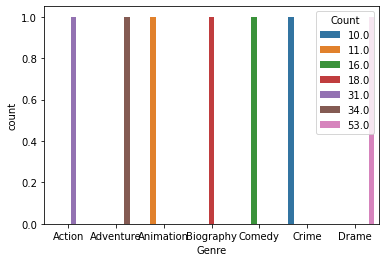

In [50]:
# Countplot for genres
sns.countplot(x='Genre', hue='Count',data=genre_top10);

**`Checkpoint 5:`** Is the bar for `Drama` the tallest?

-  ###  Subtask 3.3: Gender and Genre

If you have closely looked at the Votes- and CVotes-related columns, you might have noticed the suffixes `F` and `M` indicating Female and Male. Since we have the vote counts for both males and females, across various age groups, let's now see how the popularity of genres vary between the two genders in the dataframe. 

1. Make the first heatmap to see how the average number of votes of males is varying across the genres. Use seaborn heatmap for this analysis. The X-axis should contain the four age-groups for males, i.e., `CVotesU18M`,`CVotes1829M`, `CVotes3044M`, and `CVotes45AM`. The Y-axis will have the genres and the annotation in the heatmap tell the average number of votes for that age-male group. 

2. Make the second heatmap to see how the average number of votes of females is varying across the genres. Use seaborn heatmap for this analysis. The X-axis should contain the four age-groups for females, i.e., `CVotesU18F`,`CVotes1829F`, `CVotes3044F`, and `CVotes45AF`. The Y-axis will have the genres and the annotation in the heatmap tell the average number of votes for that age-female group. 

3. Make sure that you plot these heatmaps side by side using `subplots` so that you can easily compare the two genders and derive insights.

4. Write your any three inferences from this plot. You can make use of the previous bar plot also here for better insights.
Refer to this link- https://seaborn.pydata.org/generated/seaborn.heatmap.html. You might have to plot something similar to the fifth chart in this page (You have to plot two such heatmaps side by side).

5. Repeat subtasks 1 to 4, but now instead of taking the CVotes-related columns, you need to do the same process for the Votes-related columns. These heatmaps will show you how the two genders have rated movies across various genres.

You might need the below link for formatting your heatmap.
https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot

-  Note : Use `genre_top10` dataframe for this subtask

In [53]:
# 1st set of heat maps for CVotes-related columns
corr = genre_top10.loc[:,"CVotes10":"CVotes01"].corr()
corr


,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01
CVotes10,1.000000,0.951573,0.819081,0.891402,0.947116,0.883355,0.790084,0.727503,0.668353,0.829587
CVotes09,0.951573,1.000000,0.945136,0.974597,0.970921,0.890171,0.810295,0.757690,0.706557,0.865350
CVotes08,0.819081,0.945136,1.000000,0.986156,0.890378,0.763929,0.676360,0.623650,0.576173,0.754005
CVotes07,0.891402,0.974597,0.986156,1.000000,0.946922,0.839118,0.749165,0.693125,0.643208,0.817581
CVotes06,0.947116,0.970921,0.890378,0.946922,1.000000,0.965158,0.905553,0.860973,0.816902,0.937138
CVotes05,0.883355,0.890171,0.763929,0.839118,0.965158,1.000000,0.982837,0.959394,0.931557,0.985367
CVotes04,0.790084,0.810295,0.676360,0.749165,0.905553,0.982837,1.000000,0.994648,0.980447,0.984867
CVotes03,0.727503,0.757690,0.623650,0.693125,0.860973,0.959394,0.994648,1.000000,0.994965,0.973520
CVotes02,0.668353,0.706557,0.576173,0.643208,0.816902,0.931557,0.980447,0.994965,1.000000,0.960219
CVotes01,0.829587,0.865350,0.754005,0.817581,0.937138,0.985367,0.984867,0.973520,0.960219,1.000000


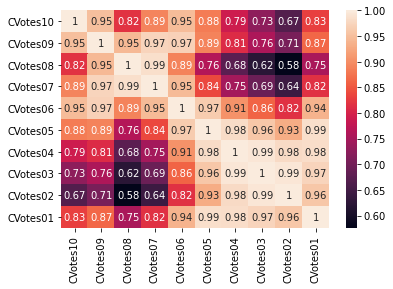

In [56]:
sns.heatmap(corr, annot=True);

**`Inferences:`** A few inferences that can be seen from the heatmap above is that males have voted more than females, and Sci-Fi appears to be most popular among the 18-29 age group irrespective of their gender. What more can you infer from the two heatmaps that you have plotted? Write your three inferences/observations below:
- Inference 1:
- Inference 2:
- Inference 3:

In [57]:
# 2nd set of heat maps for Votes-related columns
corr2 = genre_top10.loc[:,"VotesM":"VotesnUS"].corr()
corr2


,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS
VotesM,1.000000,0.500513,0.228037,-0.066775,0.554592,0.711933,0.662500,0.479517,0.823079,0.847288,0.509017,0.839905,0.855457,0.657210,0.654159,0.744947,0.777804
VotesF,0.500513,1.000000,-0.544172,-0.798257,0.845868,0.923673,0.464063,0.997152,0.866551,0.348873,0.996352,0.634237,0.580030,0.783071,0.273977,0.382850,0.729379
VotesU18,0.228037,-0.544172,1.000000,0.933630,-0.131189,-0.301457,0.383296,-0.522798,-0.168078,0.259637,-0.567111,-0.098818,-0.059838,-0.375196,0.215119,0.220858,-0.191485
VotesU18M,-0.066775,-0.798257,0.933630,1.000000,-0.442570,-0.611307,0.076936,-0.783789,-0.471395,0.051787,-0.811369,-0.314443,-0.266790,-0.562568,0.061196,-0.007825,-0.454141
VotesU18F,0.554592,0.845868,-0.131189,-0.442570,1.000000,0.791020,0.595402,0.867354,0.848956,0.395705,0.837699,0.568457,0.516721,0.618961,0.255551,0.468805,0.505218
Votes1829,0.711933,0.923673,-0.301457,-0.611307,0.791020,1.000000,0.690359,0.920807,0.889983,0.483779,0.904542,0.673464,0.636483,0.730552,0.389778,0.503944,0.907370
Votes1829M,0.662500,0.464063,0.383296,0.076936,0.595402,0.690359,1.000000,0.477062,0.611524,0.401347,0.414755,0.459212,0.435286,0.399772,0.281652,0.329424,0.709386
Votes1829F,0.479517,0.997152,-0.522798,-0.783789,0.867354,0.920807,0.477062,1.000000,0.851713,0.321119,0.989411,0.590636,0.534284,0.740384,0.252181,0.380330,0.705300
Votes3044,0.823079,0.866551,-0.168078,-0.471395,0.848956,0.889983,0.611524,0.851713,1.000000,0.731141,0.877432,0.892203,0.864911,0.882392,0.586237,0.669193,0.780840
Votes3044M,0.847288,0.348873,0.259637,0.051787,0.395705,0.483779,0.401347,0.321119,0.731141,1.000000,0.376638,0.814881,0.841152,0.609336,0.935346,0.908132,0.539552


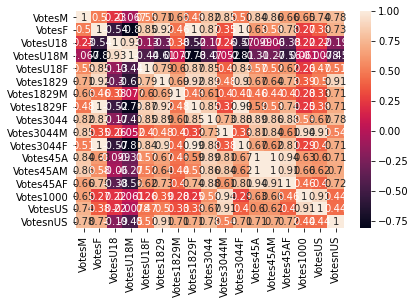

In [58]:
sns.heatmap(corr2, annot=True);